In [1]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\Downloads\\delivery_time.csv")

In [3]:
print (data)

    Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


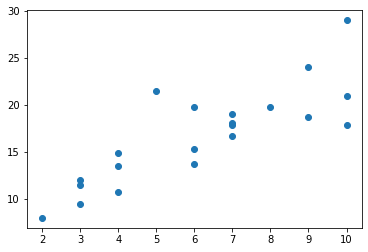

In [4]:
x = [10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5]
y = [21.00,13.50,19.75,24.00,29.00,15.35,19.00,9.50,17.90,18.75,19.83,10.75,16.68,11.50,12.03,14.88,13.75,18.11,8.00,17.83,21.50]
plt.scatter(x,y)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

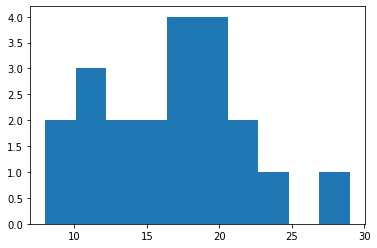

In [6]:
plt.hist(data['Delivery Time'])

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

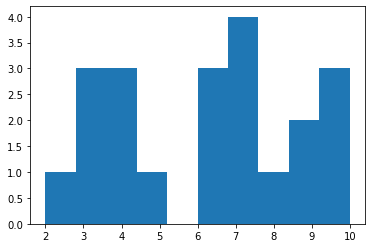

In [7]:
plt.hist(data['Sorting Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19e9350b430>,
 'caps': [<matplotlib.lines.Line2D at 0x19e9350b940>,
 'boxes': [<matplotlib.lines.Line2D at 0x19e9350b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x19e9350bfd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19e93517370>],
 'means': []}

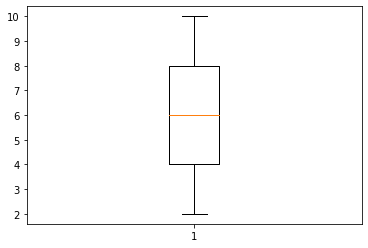

In [8]:
plt.boxplot(data['Sorting Time'],vert=True)

In [9]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

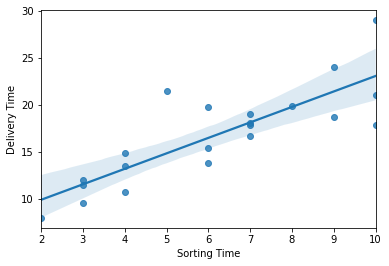

In [10]:
sns.regplot(x = "Sorting Time" , y = "Delivery Time" , data =data)

In [11]:
import statsmodels.formula.api as smf

In [12]:
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

In [13]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
model = smf.ols("delivery_time~sorting_time",data = data).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           3.98e-06
Time:                        01:15:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [17]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [18]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [19]:
delivery_time = (6.582734) + (1.649020)*15
delivery_time

31.318033999999997

In [20]:
new_data = pd.Series([15,20])
new_data

0    15
1    20
dtype: int64

In [21]:
data_pred = pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,15
1,20


In [22]:
model.predict(data_pred)

0    31.318032
1    39.563132
dtype: float64